In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import funky as f

# TASK 1. Word count

## CONFIGURATION STUDY

We measured the mean computational time for a different number of total threads and for different partition sizes of our bag.

We produced different graphs for the number of total threads: for each of them, we plot the performances of different cluster configuration, varying the number of n_workers (i.e. processes) and n_threads (i.e. thread for each process).

In this way, we were able to compare the performances of the task executed using multiprocessing versus multithreading.


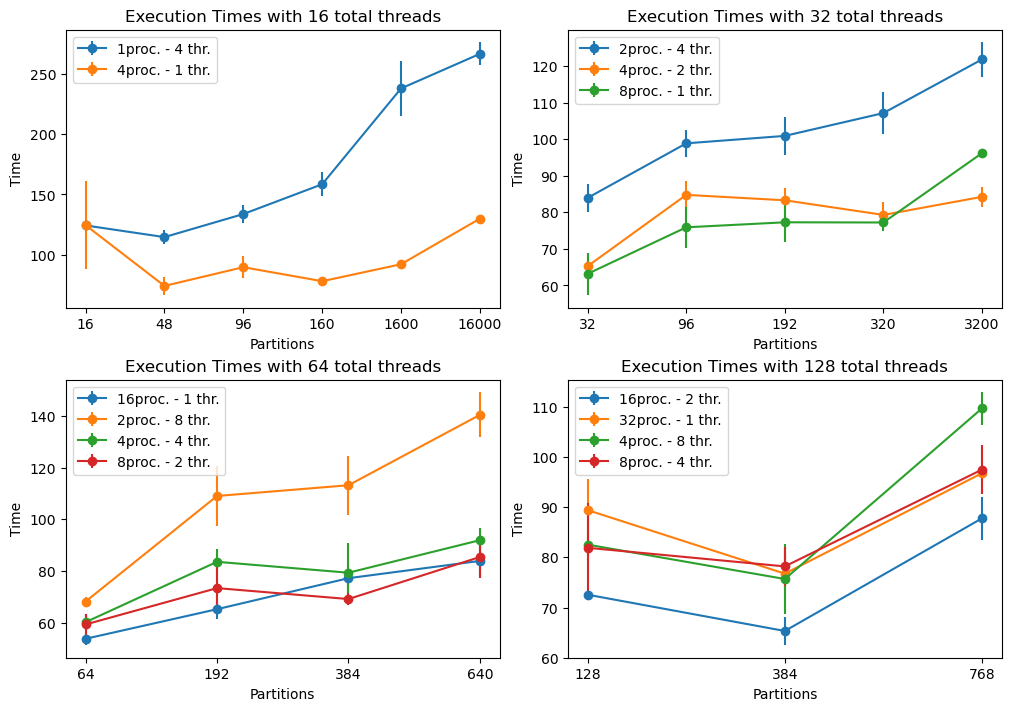

In [ ]:
g,ax=plt.subplots(2,2,figsize=(10,7),layout='constrained')
f.plot_performances('benchmarks_1_16.csv',0,0,ax)
f.plot_performances('benchmarks_1_32.csv',0,1,ax)
f.plot_performances('benchmarks_1_64.csv',1,0,ax)
f.plot_performances('benchmarks_1_128.csv',1,1,ax)

We find that in general, for this specific task, multiprocessing is better than multithreading. This is coherent with the fact that the Dask.bag object is built to rely to the multiprocessing scheduler in order to bypass the GIL. 

### Comparing total threads
We display a heatmap containing, for each number of partitions, the mean times varying the number of total threads. 

We chose for each threads number the best cluster configuration based on the graphs above.

indexes of the grid:  [ 16  32  96 128 192 384] [ 16  32  64 128]


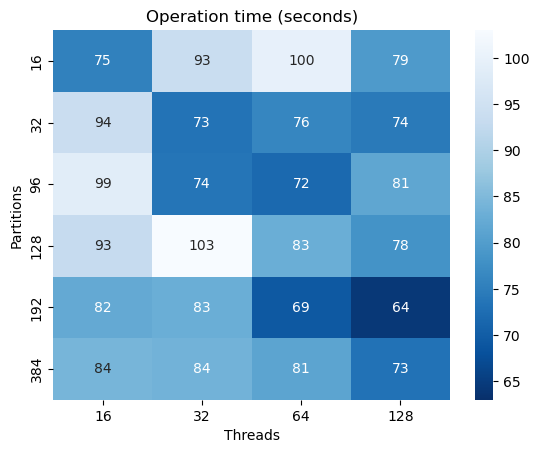

In [ ]:
f.heat('benchmarks_1_f.csv')

We find that increasing the number of total threads leads to better performances. However the total computational times are very close between the third and the fourth column.
We could also argue that we find lower times in the diagonal, meaning that the number of threads should be close to the number of partitions.

In [7]:
path='benchmarks_1_d'
df=pd.read_csv(path+'.csv')
for i in [1]:
    df2=df[df['n_workers']*df['n_threads']==i]
    df2.to_csv(path+str(int(i*4))+'.csv',index=False)


32


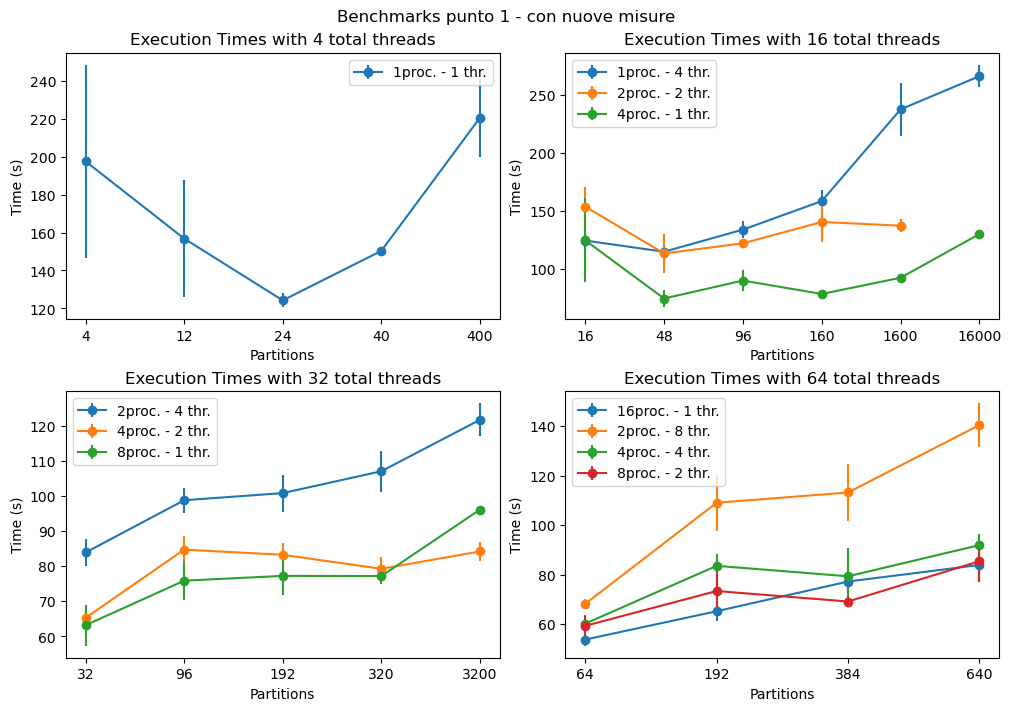

In [22]:

fig,ax=plt.subplots(2,2,figsize=(10,7),layout='constrained')
fig.suptitle('Benchmarks punto 1 - con nuove misure')
threads=[[4,16],[32,64]]
print(threads[1][0])
for i in range(2):
    f.plot_performances(f'benchmarks_1_d{threads[0][i]}.csv',0,i,ax)
    f.plot_performances(f'benchmarks_1_{threads[1][i]}.csv',1,i,ax)


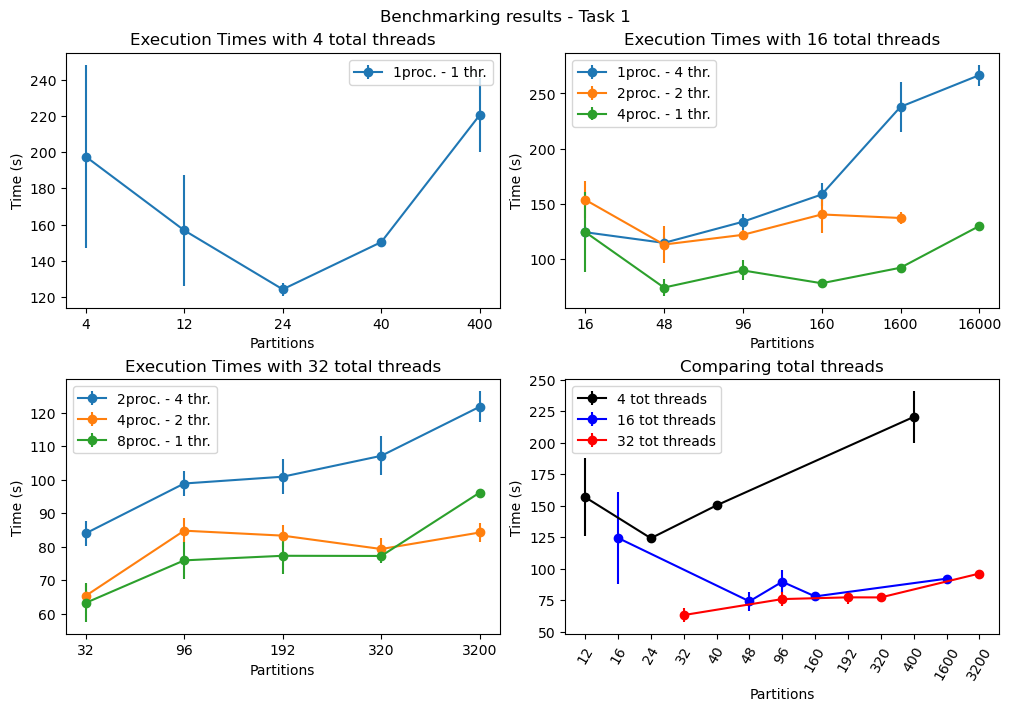

In [ ]:

fig,ax=plt.subplots(2,2,figsize=(10,7),layout='constrained')
fig.suptitle('Benchmarking results - Task 1')

#First, second and third graph

f.plot_performances(f'bm/benchmarks_1_d4.csv',0,0,ax)
f.plot_performances(f'bm/benchmarks_1_d16.csv',0,1,ax)
f.plot_performances(f'bm/benchmarks_1_32.csv',1,0,ax)

#Third graph

#read and clean data
dfs=[pd.read_csv('bm/benchmarks_1_d4.csv'),pd.read_csv('bm/benchmarks_1_d16.csv'),pd.read_csv('bm/benchmarks_1_d32.csv')]
dfs[1]=dfs[1][dfs[1]['n_workers']==4] #selecting only the best configuration
dfs[2]=dfs[2][dfs[2]['n_workers']==8]
dfs[0]=dfs[0][dfs[0]['n_partitions']>11]
dfs[1]=dfs[1][dfs[1]['n_partitions']<1700]

#setting local variables
partitions=np.concat([dfs[0]['n_partitions'].values,dfs[1]['n_partitions'].values,dfs[2]['n_partitions'].values])
partitions=(np.unique(sorted(partitions)))
colors=['k','blue','red']

#plotting the errorbar
for i in range(3):

    dfs[i]['time']=np.round((dfs[i]['time1']+dfs[i]['time2']+dfs[i]['time3'])/3,2)
    dfs[i]['std']=np.round(np.std([dfs[i]['time1'],dfs[i]['time2'],dfs[i]['time3']],axis=0),2)

    x=[int(np.argwhere(partitions==i)[0][0])+1 for i in dfs[i]['n_partitions'].values]

    num_threads=str(dfs[i]['n_workers'].values[0]*dfs[i]['n_threads'].values[0]*4)
    results=dfs[i].drop(columns=['n_workers','n_threads','time1','time2','time3'])
    y=results.to_numpy()

    ax[1,1].errorbar(x=x,y=y[:,1],yerr=y[:,2],label=f'{num_threads} tot threads',fmt='o-',c=colors[i])
    
ax[1,1].legend()
ax[1,1].set_xticks(np.arange(1,len(partitions)+1,1))
ax[1,1].set_xticklabels(partitions, rotation=60)
ax[1,1].set_title('Comparing total threads')
ax[1,1].set_xlabel('Partitions')
ax[1,1].set_ylabel('Time (s)')
plt.show()



# TASK 2. Search by Country/Institute

In [ ]:
##############à PER DIVIDERE IN NUM THREADS. FARE SOLO UNA VOLTA PER FILE
path='bm_2_persist_institute'
df=pd.read_csv(path+'.csv')
for i in [4,8,16,32]:
    df2=df[df['n_workers']*df['n_threads']==i]
    df2.to_csv(path+str(int(i*4))+'.csv',index=False)


In [ ]:
################### PER AGGIUNGERE AI FILE LE MISURE NUOVE DEL 19/07
path='bm_2_compute_country'

df=pd.read_csv(path+'_1.csv')
for i in [1,4]:
    if i==4: header=False
    else: header=True
    df2=df[df['n_workers']*df['n_threads']==i]
    df2.to_csv(path+str(int(i*4))+'.csv',mode='a',index=False,header=header)

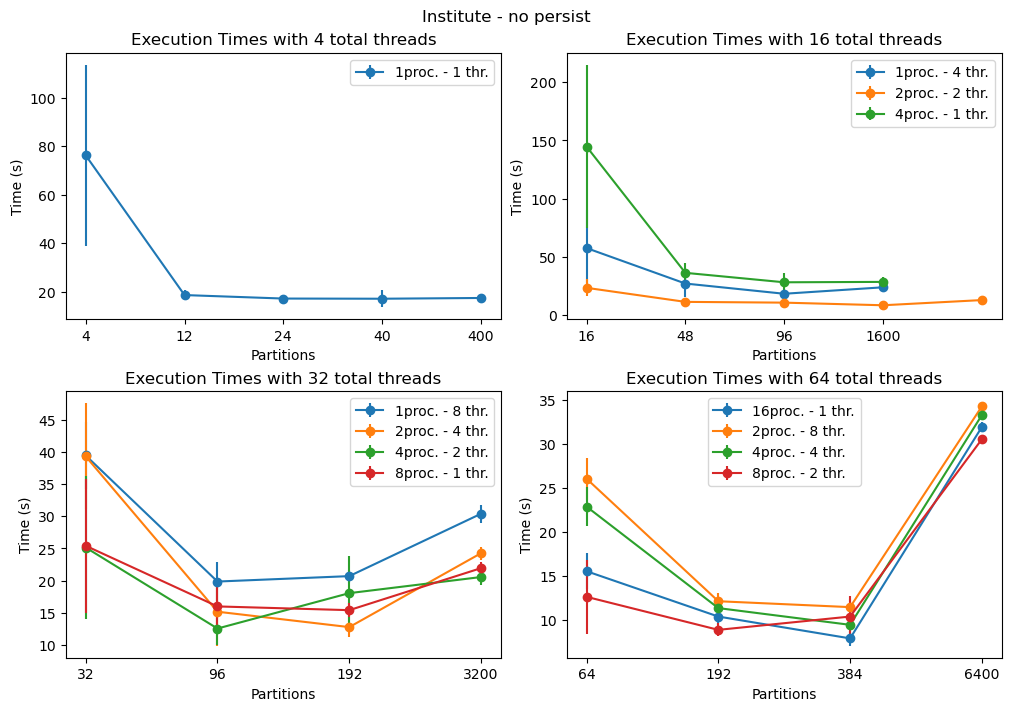

In [13]:
fig,ax=plt.subplots(2,2,figsize=(10,7),layout='constrained')
fig.suptitle('Institute - no persist')
threads=[[4,16],[32,64]]
for i in range(2):
    for j in range(2):
        f.plot_performances(f'bm_2_compute_institute{threads[i][j]}.csv',i,j,ax)

voglio praticamente mostrare 4,16,32 per tre volte no?


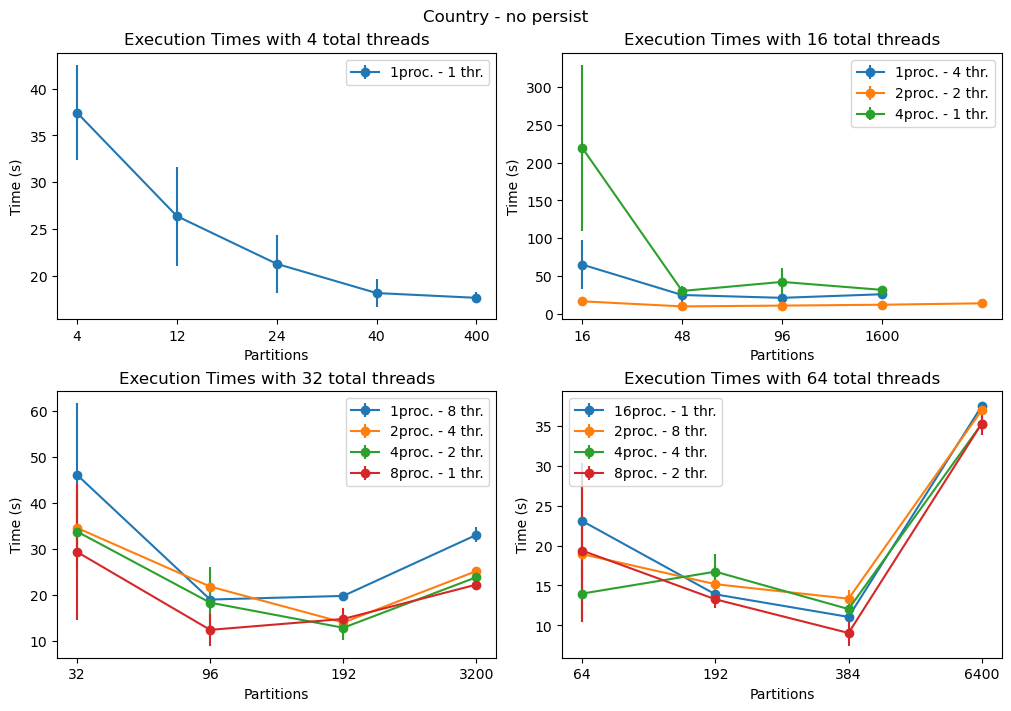

In [14]:
fig,ax=plt.subplots(2,2,figsize=(10,7),layout='constrained')
fig.suptitle('Country - no persist')
threads=[[4,16],[32,64]]
for i in range(2):
    for j in range(2):
        f.plot_performances(f'bm_2_compute_country{threads[i][j]}.csv',i,j,ax)

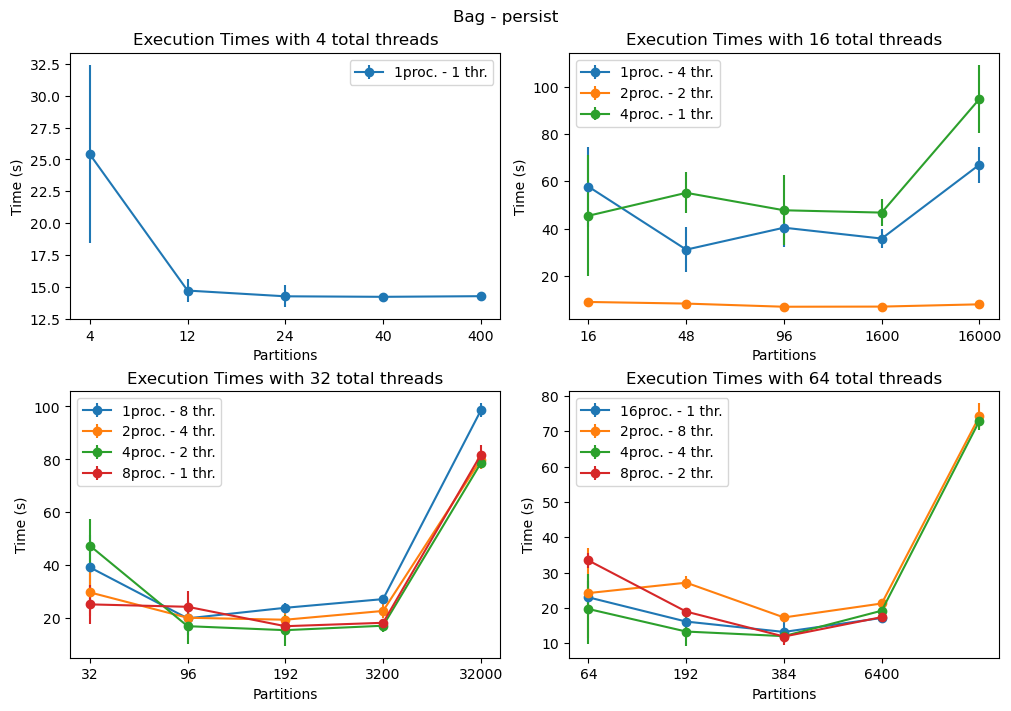

In [15]:
fig,ax=plt.subplots(2,2,figsize=(10,7),layout='constrained')
fig.suptitle('Bag - persist')
threads=[[4,16],[32,64]]
for i in range(2):
    for j in range(2):
        f.plot_performances(f'bm_2_persist_bag{threads[i][j]}.csv',i,j,ax)

Ora che ho dimostrato che le configurazioni che performano meglio sono sempre più o meno le stesse, faccio un bel grafico di quello che voglio io.

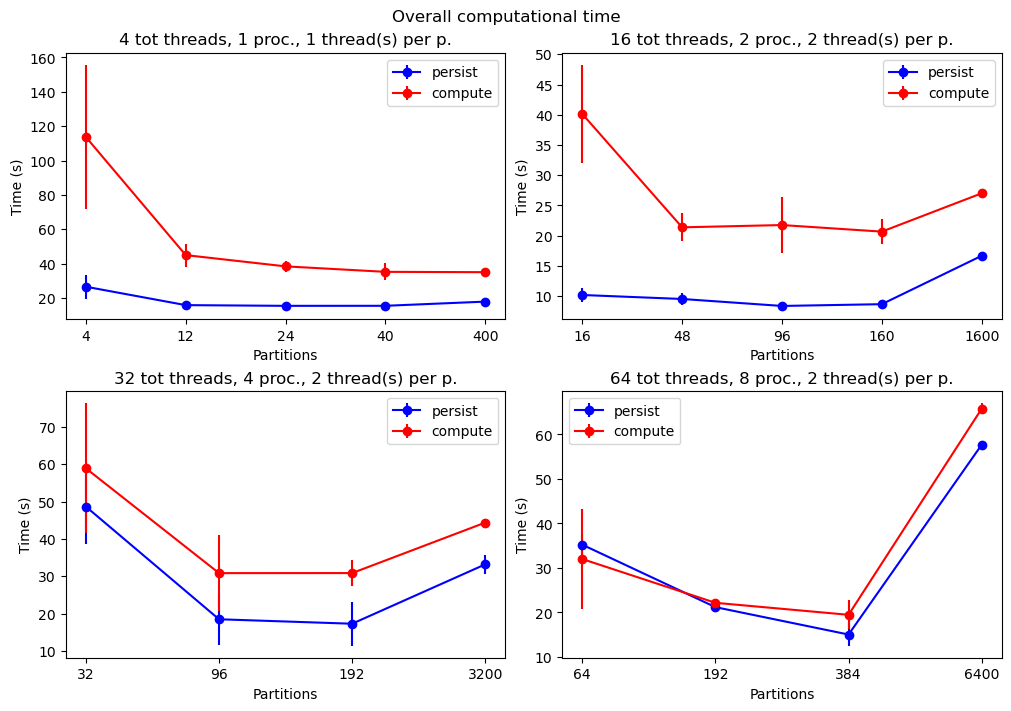

In [20]:
fig,ax=plt.subplots(2,2,figsize=(10,7),layout='constrained')
fig.suptitle('Overall computational time')
threads=[[4,16],[32,64]]
workers=[[1,2],[4,8]]
for i in range(2):
    for j in range(2):
        df1=pd.read_csv(f'bm_2_persist_bag{threads[i][j]}.csv')
        df2=pd.read_csv(f'bm_2_persist_country{threads[i][j]}.csv')
        df3=pd.read_csv(f'bm_2_persist_institute{threads[i][j]}.csv')
        df1=df1[df1['n_partitions']<=15000]
        df2=df2[df2['n_partitions']<=15000]
        df3=df3[df3['n_partitions']<=15000]
        
        df1['time1']=df1['time1']+df2['time1']+df3['time1']
        df1['time2']=df1['time2']+df2['time2']+df3['time2']
        df1['time3']=df1['time3']+df2['time3']+df3['time3']

        df2=pd.read_csv(f'bm_2_compute_country{threads[i][j]}.csv')
        df3=pd.read_csv(f'bm_2_compute_institute{threads[i][j]}.csv')

        df2['time1']=df2['time1']+df3['time1']
        df2['time2']=df2['time2']+df3['time2']
        df2['time3']=df2['time3']+df3['time3']

        df1=df1[df1['n_workers']==workers[i][j]]
        df2=df2[df2['n_workers']==workers[i][j]]

        df1['mean']=(df1['time1']+df1['time2']+df1['time3'])/3
        df2['mean']=(df2['time1']+df2['time2']+df2['time3'])/3
        df1['std']=np.round(np.std([df1['time1'],df1['time2'],df1['time3']],axis=0),2)
        df2['std']=np.round(np.std([df2['time1'],df2['time2'],df2['time3']],axis=0),2)
            
        ax[i,j].errorbar(x=range(len(df1['n_partitions'])),y=df1['mean'],yerr=df1['std'],label=f'persist',fmt='o-',c='b')
        ax[i,j].errorbar(x=range(len(df2['n_partitions'])),y=df2['mean'],yerr=df2['std'],label=f'compute',fmt='o-',c='r')
        thr=int(threads[i][j]/4 /workers[i][j])
        ax[i,j].set_title(f'{threads[i][j]} tot threads, {workers[i][j]} proc., {thr} thread(s) per p.')
        ax[i,j].set_xlabel('Partitions')
        ax[i,j].set_ylabel('Time (s)')
        ax[i,j].set_xticks(range(len(df1['n_partitions'])))
        ax[i,j].set_xticklabels(np.array(df1['n_partitions'],dtype=int))
        ax[i,j].legend()
        #ax[i,j].set_xscale('log')

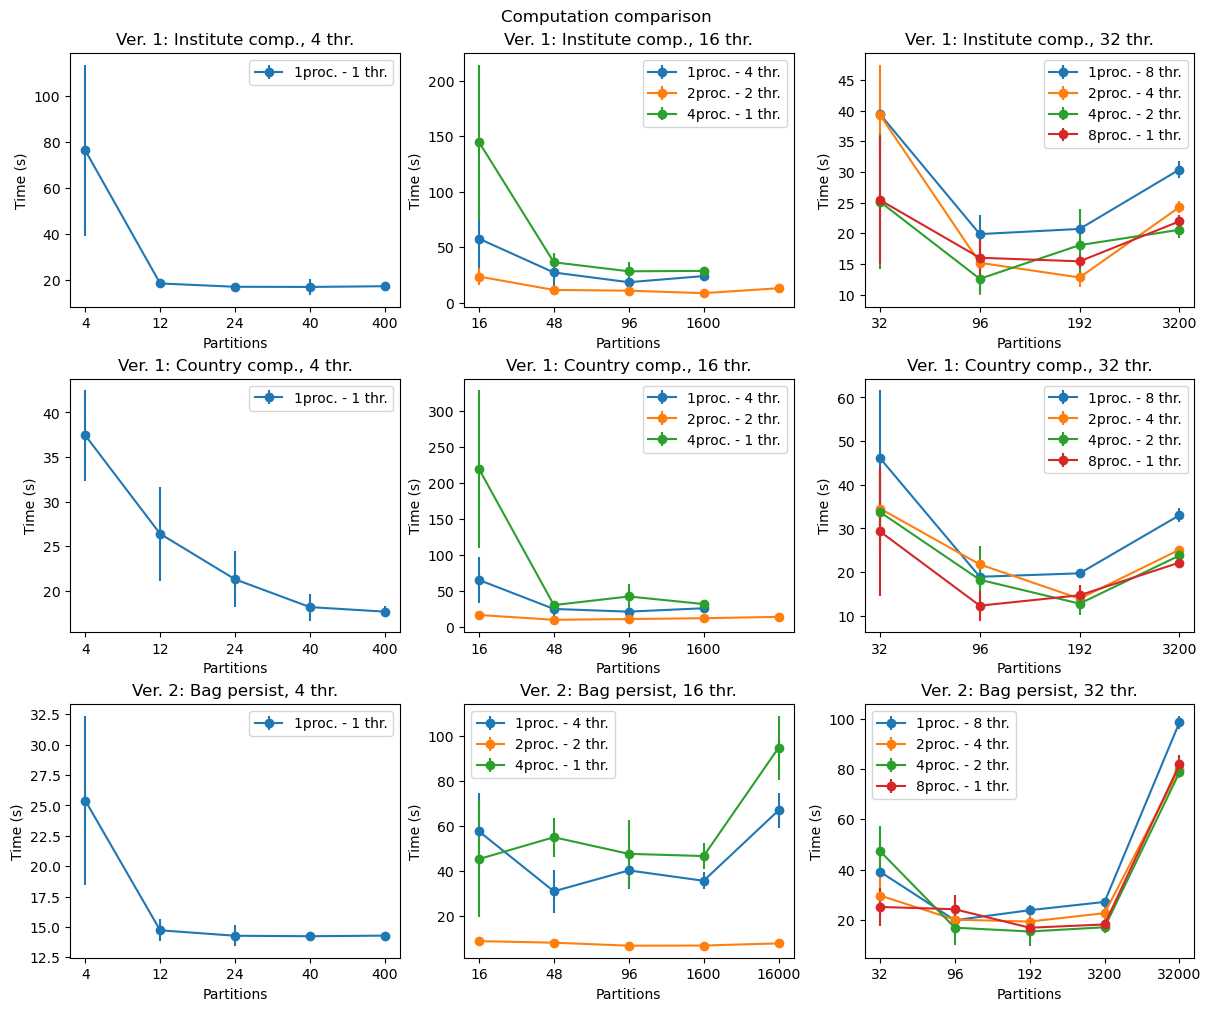

In [9]:
fig,ax=plt.subplots(3,3,figsize=(12,10),layout='constrained')
fig.suptitle('Computation comparison')
threads=[ 4,16, 32]
for i in range(3):
    f.plot_performances(f'bm/bm_2_compute_institute{threads[i]}.csv',0,i,ax, title='Ver. 1: Institute comp.')
    f.plot_performances(f'bm/bm_2_compute_country{threads[i]}.csv',1,i,ax, title='Ver. 1: Country comp.')
    f.plot_performances(f'bm/bm_2_persist_bag{threads[i]}.csv',2,i,ax, title='Ver. 2: Bag persist')

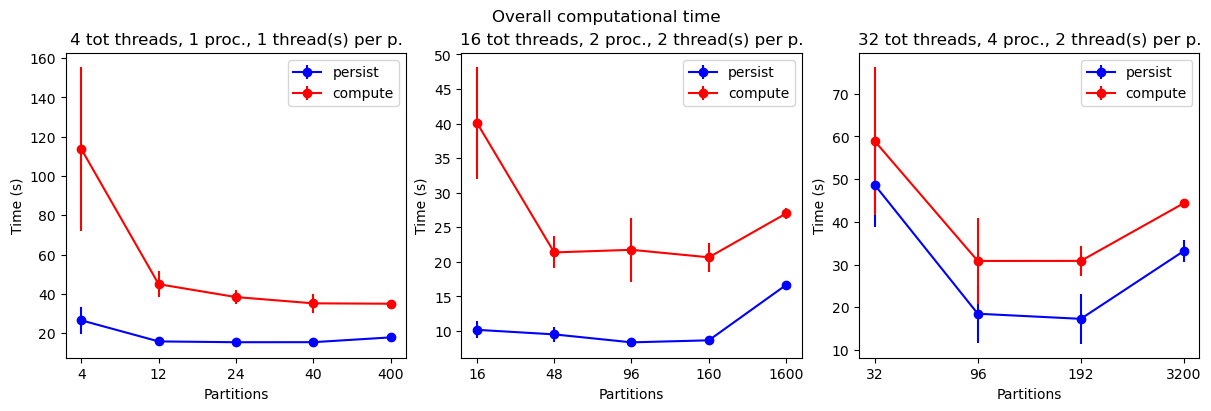

In [8]:
fig,ax=plt.subplots(1,3,figsize=(12,4),layout='constrained')
fig.suptitle('Overall computational time')
threads=[4,16,32]
workers=[1,2,4]
for i in range(3):
    df1=pd.read_csv(f'bm/bm_2_persist_bag{threads[i]}.csv')
    df2=pd.read_csv(f'bm/bm_2_persist_country{threads[i]}.csv')
    df3=pd.read_csv(f'bm/bm_2_persist_institute{threads[i]}.csv')
    df1=df1[df1['n_partitions']<=15000]
    df2=df2[df2['n_partitions']<=15000]
    df3=df3[df3['n_partitions']<=15000]
    
    df1['time1']=df1['time1']+df2['time1']+df3['time1']
    df1['time2']=df1['time2']+df2['time2']+df3['time2']
    df1['time3']=df1['time3']+df2['time3']+df3['time3']

    df2=pd.read_csv(f'bm/bm_2_compute_country{threads[i]}.csv')
    df3=pd.read_csv(f'bm/bm_2_compute_institute{threads[i]}.csv')

    df2['time1']=df2['time1']+df3['time1']
    df2['time2']=df2['time2']+df3['time2']
    df2['time3']=df2['time3']+df3['time3']

    df1=df1[df1['n_workers']==workers[i]]
    df2=df2[df2['n_workers']==workers[i]]

    df1['mean']=(df1['time1']+df1['time2']+df1['time3'])/3
    df2['mean']=(df2['time1']+df2['time2']+df2['time3'])/3
    df1['std']=np.round(np.std([df1['time1'],df1['time2'],df1['time3']],axis=0),2)
    df2['std']=np.round(np.std([df2['time1'],df2['time2'],df2['time3']],axis=0),2)
        
    ax[i].errorbar(x=range(len(df1['n_partitions'])),y=df1['mean'],yerr=df1['std'],label=f'persist',fmt='o-',c='b')
    ax[i].errorbar(x=range(len(df2['n_partitions'])),y=df2['mean'],yerr=df2['std'],label=f'compute',fmt='o-',c='r')
    thr=int(threads[i]/4 /workers[i])
    ax[i].set_title(f'{threads[i]} tot threads, {workers[i]} proc., {thr} thread(s) per p.')
    ax[i].set_xlabel('Partitions')
    ax[i].set_ylabel('Time (s)')
    ax[i].set_xticks(range(len(df1['n_partitions'])))
    ax[i].set_xticklabels(np.array(df1['n_partitions'],dtype=int))
    ax[i].legend()
      

# PART 3


# EXTRAS/OLD

In [7]:
df= pd.concat([pd.read_csv("benchmarks_1_64.csv"),pd.read_csv('benchmarks_1_16.csv'),pd.read_csv('benchmarks_1_32.csv'),pd.read_csv('benchmarks_1_128.csv')])
df['total_threads']=df['n_workers']*df['n_threads'] * 4
df['time']=(df['time1']+df['time2']+df['time3'])/3
df['time']=np.round(df['time'],2)
df['std']=np.round(np.std([df['time1'],df['time2'],df['time3']],axis=0),2)
df['time']=np.round(df['time'],2)
df['best_config']=df['n_workers'].astype(str) + 'proc. - ' + df['n_threads'].astype(str)+ ' thr.'


In [9]:
result = df.loc[df.groupby(['total_threads'])['time'].idxmin()]
# Optional: keep only the relevant columns
result = result[['total_threads', 'n_partitions', 'best_config', 'time','std']].sort_values('total_threads')
result


,total_threads,n_partitions,best_config,time,std
2,16,48,4proc. - 1 thr.,74.10,7.59
2,16,48,4proc. - 1 thr.,74.10,7.59
6,16,160,4proc. - 1 thr.,78.01,2.72
3,16,48,1proc. - 4 thr.,114.57,5.50
3,32,96,4proc. - 2 thr.,84.76,3.75
6,32,192,4proc. - 2 thr.,83.28,3.29
2,32,32,8proc. - 1 thr.,63.18,5.82
2,32,32,8proc. - 1 thr.,63.18,5.82
6,64,192,2proc. - 8 thr.,109.02,11.56
3,64,64,16proc. - 1 thr.,53.75,2.44


In [ ]:
df= pd.read_csv('benchmarks_1_a.csv')
df['total_threads']=df['n_workers']*df['n_threads'] * 4
#df['mean time']=(df['time_1']+df['time_2']+df['time_3'])/3 /60
df['time']=np.round(df['time'],2)
df.head()


,n_workers,n_threads,n_partitions,time,total_threads
0,4,1,16,270.36,16
1,1,4,16,170.87,16
2,1,1,16,279.17,4
3,4,1,32,158.43,16
4,1,4,32,128.40,16


In [ ]:
# misure di una cella

x=df[df['n_partitions']==32]
x[x['total_threads']==128]

,n_workers,n_threads,n_partitions,time,total_threads
12,4,8,32,67.89,128
13,8,4,32,86.00,128
14,16,2,32,50.77,128
19,2,16,32,84.94,128


In [ ]:
best_conf = df.loc[df.groupby(['total_threads','n_partitions'])['time'].idxmin()]
best_conf = best_conf[['total_threads', 'n_partitions', 'n_workers', 'n_threads', 'time']]
best_conf[best_conf['total_threads']>4]


,total_threads,n_partitions,n_workers,n_threads,time
1,16,16,1,4,170.87
4,16,32,1,4,128.40
6,16,64,4,1,116.13
27,16,128,4,1,102.89
79,16,512,4,1,94.52
22,32,16,4,2,72.55
24,32,32,4,2,68.96
26,32,64,4,2,57.18
28,32,128,4,2,108.66
80,32,512,4,2,84.62


indexes of the grid:  [ 16  32  64 128 512] [   4   16   32  128  512 1024 2048]


[Text(0.5, 1.0, 'Operation time (seconds)'),
 Text(0.5, 23.52222222222222, 'Threads'),
 Text(50.722222222222214, 0.5, 'Partitions')]

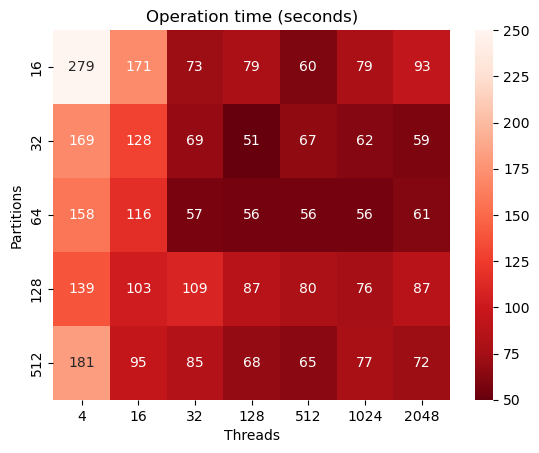

In [ ]:
df_print=df.drop(['n_workers','n_threads'],axis=1)
partitions=np.unique(np.sort(np.array(df_print['n_partitions'])))
threads=np.unique(np.sort(np.array(df_print['total_threads'])))

print('indexes of the grid: ',partitions,threads)

matrix=np.zeros((len(partitions),len(threads)))
data=df_print.to_numpy()
#print(data)
for i in range(len(partitions)):
    for j in range(len(threads)):
        for k in range(data.shape[0]):
            if data[k,0]==partitions[i] and data[k,2]==threads[j]:
                if matrix[i,j] !=0:
                    if matrix[i,j]>data[k,1]: matrix[i,j]=np.round(data[k,1],2) #se ho un risultato minore, lo sostituisco
                else:matrix[i,j]=np.round(data[k,1],2) 
#print('Result matrix: \n',matrix)

ax=sns.heatmap(matrix,cmap='Reds_r',vmin=50,vmax=250,annot=True,xticklabels=threads,yticklabels=partitions, fmt=".0f")
ax.set(title='Operation time (seconds)' ,xlabel='Threads',ylabel='Partitions')


### Benchmark 2. Rifaccio ma con 3 misure di tempi per farci una statistica. 
Qui è l'inizio della fine. Niente ha più senso. 
Da rirunnare con i dati nuovi (fare scp)

In [ ]:
df= pd.read_csv('benchmarks_1_b.csv')
df['total_threads']=df['n_workers']*df['n_threads'] * 4
df['time']=(df['time1']+df['time2']+df['time3'])/3
df['time']=np.round(df['time'],2)
df

,n_workers,n_threads,n_partitions,time1,time2,time3,total_threads,time
0,2,16,32,82.75,81.62,94.95,128,86.44
1,4,8,32,61.97,71.25,66.33,128,66.52
2,2,16,64,73.03,75.54,69.68,128,72.75
3,4,8,64,63.25,53.39,61.34,128,59.33
4,8,16,64,63.99,48.22,50.81,512,54.34
5,4,2,16,95.87,74.35,77.56,32,82.59
6,16,2,16,81.64,73.88,57.48,128,71.00
7,8,4,16,84.51,76.65,79.66,128,80.27
8,16,8,16,80.79,79.42,113.72,512,91.31
9,32,4,16,72.23,117.36,87.28,512,92.29


In [ ]:
#best configurations

best_conf = df.loc[df.groupby(['total_threads','n_partitions'])['time'].idxmin()]
best_conf = best_conf[['total_threads', 'n_partitions', 'n_workers', 'n_threads', 'time']]
best_conf[best_conf['total_threads']>4]

,total_threads,n_partitions,n_workers,n_threads,time
20,16,16,4,1,88.92
21,16,32,4,1,80.31
22,16,64,4,1,76.64
5,32,16,4,2,82.59
10,32,32,4,2,62.81
15,32,64,4,2,67.86
6,128,16,16,2,71.00
12,128,32,8,4,54.80
16,128,64,16,2,52.60
8,512,16,16,8,91.31


In [ ]:
df_print=df.drop(['n_workers','n_threads','time1','time2','time3'],axis=1)
partitions=np.unique(np.sort(np.array(df_print['n_partitions'])))
threads=np.unique(np.sort(np.array(df_print['total_threads'])))

print('indexes of the grid: ',partitions,threads)
df_print.head()

indexes of the grid:  [16 32 64] [ 16  32 128 512]


,n_partitions,total_threads,time
0,32,128,86.44
1,32,128,66.52
2,64,128,72.75
3,64,128,59.33
4,64,512,54.34


[Text(0.5, 1.0, 'Operation time (seconds)'),
 Text(0.5, 23.52222222222222, 'Threads'),
 Text(50.722222222222214, 0.5, 'Partitions')]

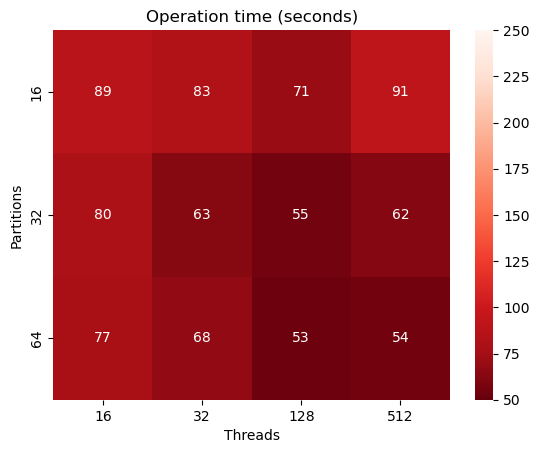

In [ ]:
matrix=np.zeros((len(partitions),len(threads)))
data=df_print.to_numpy()
#print(data)
for i in range(len(partitions)):
    for j in range(len(threads)):
        for k in range(data.shape[0]):
            if data[k,0]==partitions[i] and data[k,1]==threads[j]:
                if matrix[i,j] !=0:
                    if matrix[i,j]>data[k,2]: matrix[i,j]=np.round(data[k,2],2) #se ho un risultato minore, lo sostituisco
                else:matrix[i,j]=np.round(data[k,2],2) 
#print('Result matrix: \n',matrix)

ax=sns.heatmap(matrix,cmap='Reds_r',vmin=50,vmax=250,annot=True,xticklabels=threads,yticklabels=partitions, fmt=".0f")
ax.set(title='Operation time (seconds)' ,xlabel='Threads',ylabel='Partitions')
